# Course Notes: Dealing with Missing Data in Python

In Python, there are several ways to handle missing data in a dataset. Some common methods include:

1. **Dropping missing values**: This involves removing rows or columns that contain missing data. The `dropna()` function in pandas can be used for this purpose.

2. **Filling missing values**: Instead of removing missing data, you can fill them with a specific value. The `fillna()` function in pandas allows you to fill missing values with a constant or using various interpolation methods.

3. **Imputing missing values**: Imputation involves estimating missing values based on the available data. This can be done using statistical methods such as mean, median, or mode imputation.

4. **Using machine learning algorithms**: Another approach is to use machine learning algorithms to predict missing values based on other features in the dataset. This can be done using techniques like regression or k-nearest neighbors.

It is important to carefully consider the nature of the missing data and the specific requirements of your analysis before choosing a method to handle missing data.

Remember to always handle missing data appropriately to avoid biased or inaccurate results in your analysis.

# 1-) Missing Data Analysis

### --->

-   Identifying missing values ​​of data sets.
-   Examining the distribution and rate of missing data.
-   Identifying missing data types (`NaN`, `Null`, etc.).

In [96]:
# Importing the necessary libraries
import pandas as pd

#load dataset
df = pd.read_csv("datasets/air-quality.csv")
df0 = pd.read_csv("datasets/pima-indians-diabetes%20data.csv")

In [97]:
print("First Data Set (df):")
print(df.head(5))

print("\nSecond Data Set (df0):")
print(df0.head(5))


First Data Set (df):
         Date  Ozone  Solar  Wind  Temp
0  1976-05-01   41.0  190.0   7.4    67
1  1976-05-02   36.0  118.0   8.0    72
2  1976-05-03   12.0  149.0  12.6    74
3  1976-05-04   18.0  313.0  11.5    62
4  1976-05-05    NaN    NaN  14.3    56

Second Data Set (df0):
   Pregnant  Glucose  Diastolic_BP  ...  Diabetes_Pedigree  Age  Class
0       6.0    148.0          72.0  ...              0.627   50    1.0
1       1.0     85.0          66.0  ...              0.351   31    0.0
2       8.0    183.0          64.0  ...              0.672   32    1.0
3       1.0     89.0          66.0  ...              0.167   21    0.0
4       0.0    137.0          40.0  ...              2.288   33    1.0

[5 rows x 9 columns]


In [98]:
print("First Data Set (df):")
print(df.info(5))

print("\nSecond Data Set (df0):")
print(df0.info(5))

First Data Set (df):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    153 non-null    object 
 1   Ozone   116 non-null    float64
 2   Solar   146 non-null    float64
 3   Wind    153 non-null    float64
 4   Temp    153 non-null    int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 6.1+ KB
None

Second Data Set (df0):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnant           768 non-null    float64
 1   Glucose            763 non-null    float64
 2   Diastolic_BP       733 non-null    float64
 3   Skin_Fold          541 non-null    float64
 4   Serum_Insulin      394 non-null    float64
 5   BMI                757 non-null    float64
 6   Diabetes_Pedigree  768 non-null 

The first cell is a markdown cell that provides an introduction to the topic of dealing with missing data in Python. It explains four common methods for handling missing data: dropping missing values, filling missing values, imputing missing values, and using machine learning algorithms. It also emphasizes the importance of carefully considering the nature of the missing data and the specific requirements of the analysis.

The second cell is a code cell that imports the necessary libraries and loads a dataset named "air-quality.csv" into a dataframe named `df`.

The third cell is a code cell that displays the first 5 rows of the dataframe `df` using the `head()` function.

The fourth cell is a code cell that provides information about the dataframe `df` using the `info()` function. It displays the column names and data types of the columns in the dataframe.

# 2-) Missing Data Filling

### --->
-  Methods used to fill in missing data (`mean`, `median`, `mod`, etc.).
-  Steps and results of filling missing values ​​in the first data set.
-  Steps and results for filling missing values ​​in the second data set.

In [99]:
# Filling missing values with appropriate methods
# For 'Ozone' and 'Solar', we'll use the mean of the columns
# For 'Wind', we'll use the median of the column
# For 'Temp', we'll use the mode of the column

print("First Data Set (df):")

# Calculate mean, median, and mode
ozone_mean = df['Ozone'].mean()
solar_mean = df['Solar'].mean()
wind_median = df['Wind'].median()
temp_mode = df['Temp'].mode()[0]

# Fill missing values

df['Ozone'].fillna(ozone_mean, inplace=True)
df['Solar'].fillna(solar_mean, inplace=True)
df['Wind'].fillna(wind_median, inplace=True)
df['Temp'].fillna(temp_mode, inplace=True)

print(df.head())

print("\nSecond Data Set (df0):")

# Calculate mean, median, and mode for df0
pregnant_mean = df0['Pregnant'].mean()
glucose_mean = df0['Glucose'].mean()
diastolic_bp_median = df0['Diastolic_BP'].median()
skin_fold_mode = df0['Skin_Fold'].mode()[0]

# Fill missing values for df0
df0['Pregnant'].fillna(pregnant_mean, inplace=True)
df0['Glucose'].fillna(glucose_mean, inplace=True)
df0['Diastolic_BP'].fillna(diastolic_bp_median, inplace=True)
df0['Skin_Fold'].fillna(skin_fold_mode, inplace=True)
df0['Serum_Insulin'].fillna(df0['Serum_Insulin'].median(), inplace=True)
df0['BMI'].fillna(df0['BMI'].mean(), inplace=True)
df0['Diabetes_Pedigree'].fillna(df0['Diabetes_Pedigree'].median(), inplace=True)

print(df0.head())



First Data Set (df):
         Date     Ozone       Solar  Wind  Temp
0  1976-05-01  41.00000  190.000000   7.4    67
1  1976-05-02  36.00000  118.000000   8.0    72
2  1976-05-03  12.00000  149.000000  12.6    74
3  1976-05-04  18.00000  313.000000  11.5    62
4  1976-05-05  42.12931  185.931507  14.3    56

Second Data Set (df0):
   Pregnant  Glucose  Diastolic_BP  ...  Diabetes_Pedigree  Age  Class
0       6.0    148.0          72.0  ...              0.627   50    1.0
1       1.0     85.0          66.0  ...              0.351   31    0.0
2       8.0    183.0          64.0  ...              0.672   32    1.0
3       1.0     89.0          66.0  ...              0.167   21    0.0
4       0.0    137.0          40.0  ...              2.288   33    1.0

[5 rows x 9 columns]


# 3-) Data Discovery and Inspection

### --->

- General statistical properties of the initial data set (`mean`, `median`, `standard deviation`, etc.).
- General statistical properties of the second data set.
- Examining the relationships between variables with correlation analysis.
- Visualization of data distribution with boxplots and histograms.

### 1-)Corellation and Heatmap matrix

In [100]:
# Perform further analysis or data manipulation on the dataframe
print("\nFirst Data Set (df):")

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
correlation_matrix




First Data Set (df):


,Ozone,Solar,Wind,Temp
Ozone,1.000000,0.302970,-0.530936,0.608742
Solar,0.302970,1.000000,-0.055245,0.262569
Wind,-0.530936,-0.055245,1.000000,-0.457988
Temp,0.608742,0.262569,-0.457988,1.000000


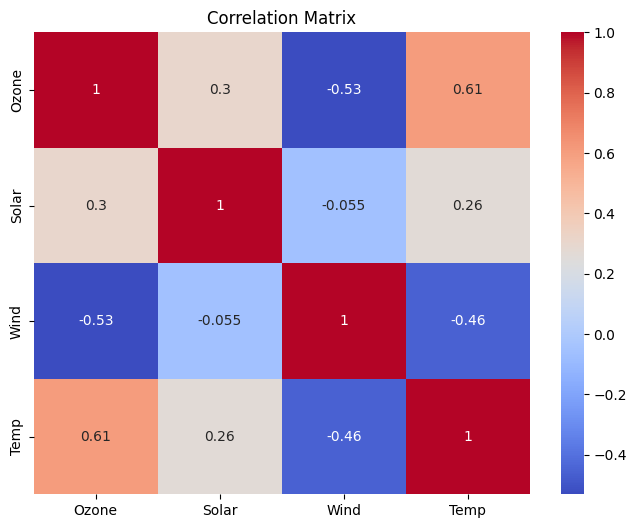

In [101]:
# 1. Explore the data further by visualizing the correlations between variables
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### 1.1-)Visualization of data distribution with boxplots and histograms.

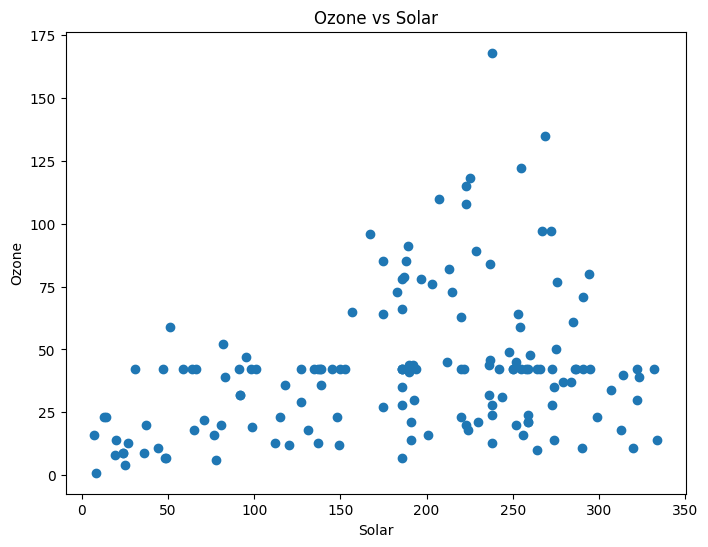

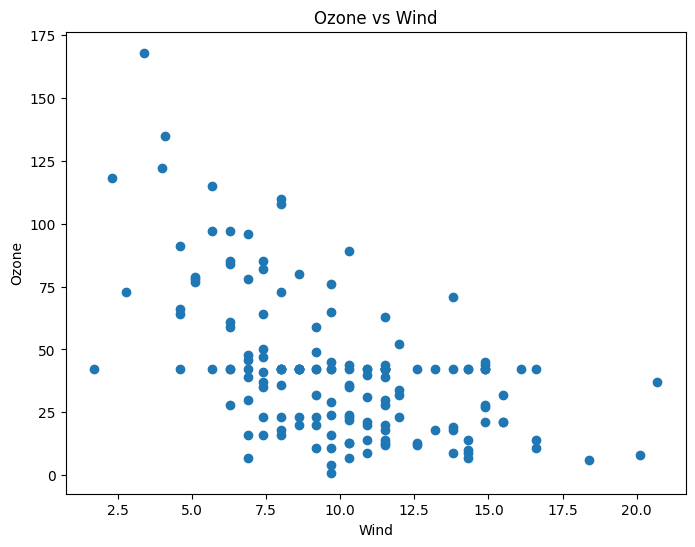

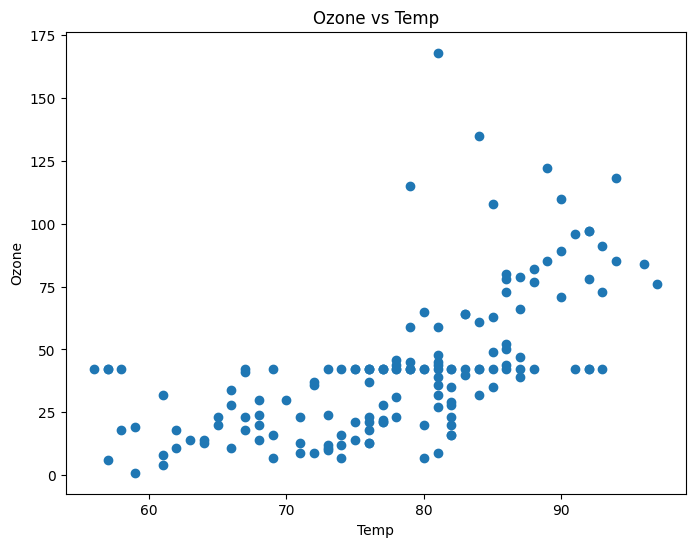

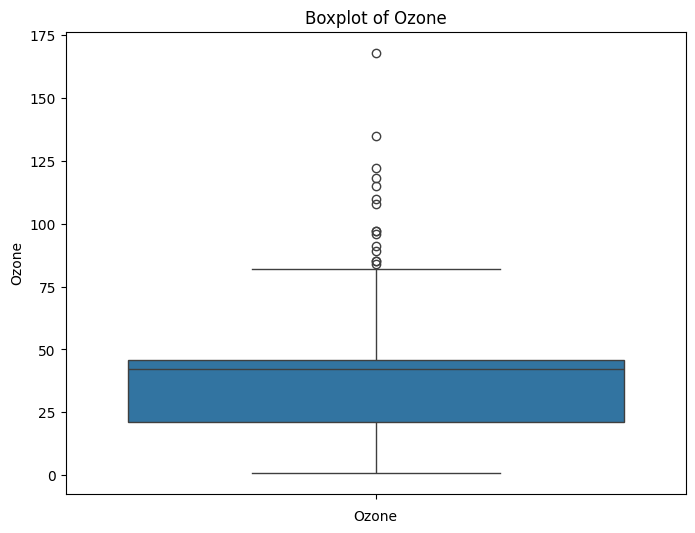

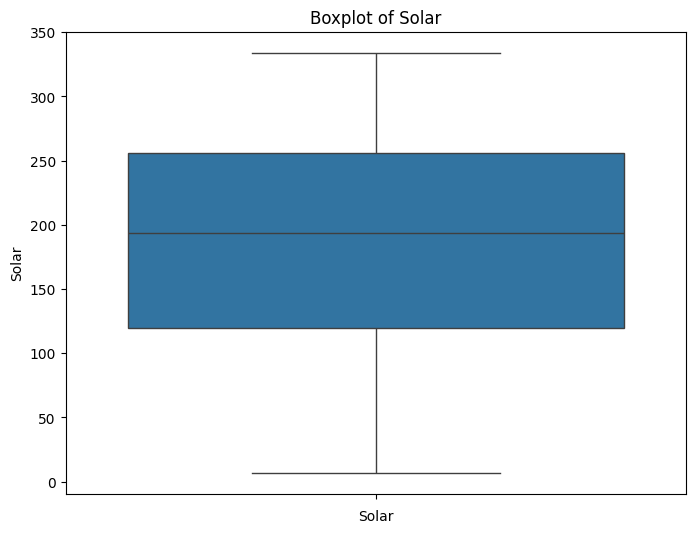

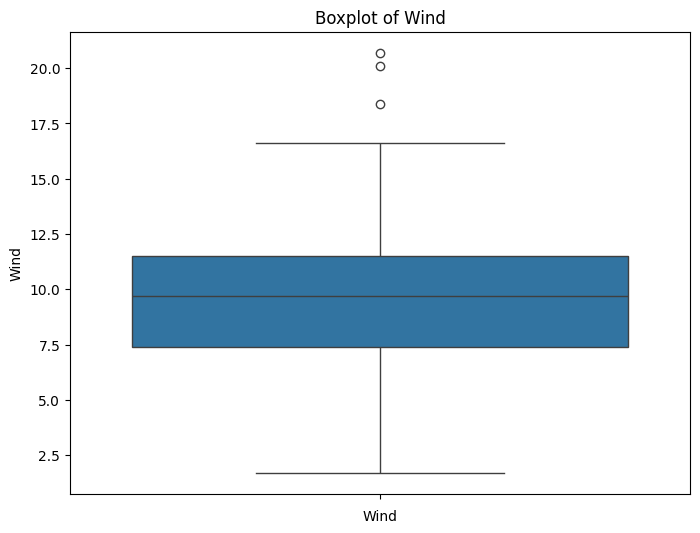

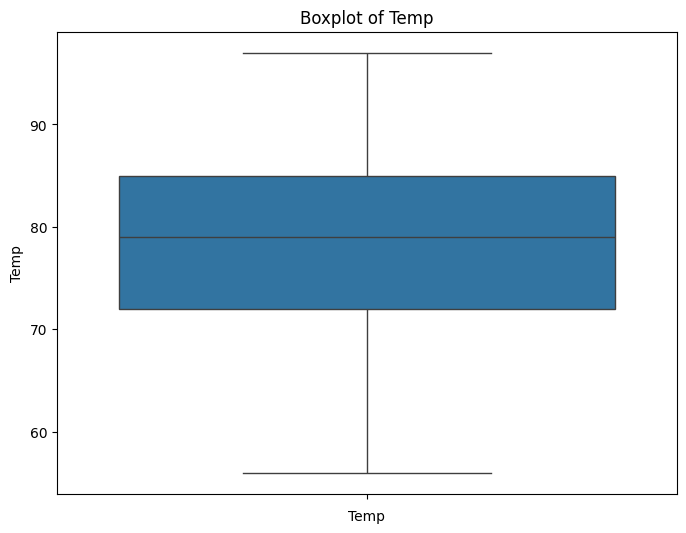

In [102]:
# 2. Analyze the relationship between 'Ozone' and other variables
# Scatter plot of 'Ozone' vs 'Solar'
plt.figure(figsize=(8, 6))
plt.scatter(df['Solar'], df['Ozone'])
plt.xlabel('Solar')
plt.ylabel('Ozone')
plt.title('Ozone vs Solar')
plt.show()

# Scatter plot of 'Ozone' vs 'Wind'
plt.figure(figsize=(8, 6))
plt.scatter(df['Wind'], df['Ozone'])
plt.xlabel('Wind')
plt.ylabel('Ozone')
plt.title('Ozone vs Wind')
plt.show()

# Scatter plot of 'Ozone' vs 'Temp'
plt.figure(figsize=(8, 6))
plt.scatter(df['Temp'], df['Ozone'])
plt.xlabel('Temp')
plt.ylabel('Ozone')
plt.title('Ozone vs Temp')
plt.show()

# 3. Perform statistical analysis on the variables
# Calculate descriptive statistics for 'Ozone'
ozone_stats = df['Ozone'].describe()
ozone_stats

# Calculate descriptive statistics for 'Solar'
solar_stats = df['Solar'].describe()
solar_stats

# Calculate descriptive statistics for 'Wind'
wind_stats = df['Wind'].describe()
wind_stats

# Calculate descriptive statistics for 'Temp'
temp_stats = df['Temp'].describe()
temp_stats

# 4. Identify outliers in the data
# Boxplot of 'Ozone'
plt.figure(figsize=(8, 6))
sns.boxplot(df['Ozone'])
plt.xlabel('Ozone')
plt.title('Boxplot of Ozone')
plt.show()

# Boxplot of 'Solar'
plt.figure(figsize=(8, 6))
sns.boxplot(df['Solar'])
plt.xlabel('Solar')
plt.title('Boxplot of Solar')
plt.show()

# Boxplot of 'Wind'
plt.figure(figsize=(8, 6))
sns.boxplot(df['Wind'])
plt.xlabel('Wind')
plt.title('Boxplot of Wind')
plt.show()

# Boxplot of 'Temp'
plt.figure(figsize=(8, 6))
sns.boxplot(df['Temp'])
plt.xlabel('Temp')
plt.title('Boxplot of Temp')
plt.show()

### 2-)Corellation and Heatmap matrix for Second Data Set

In [103]:
# Perform further analysis or data manipulation on the dataframe

print("\nSecond Data Set (df0):")

# Calculate the correlation matrix
correlation_matrix = df0.corr()

# Display the correlation matrix
correlation_matrix


Second Data Set (df0):


,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
Pregnant,1.000000,0.127911,0.208615,0.104428,0.025047,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218557,0.196406,0.419064,0.230941,0.137060,0.266534,0.492928
Diastolic_BP,0.208615,0.218557,1.000000,0.207999,0.045363,0.281319,-0.002378,0.324915,0.165723
Skin_Fold,0.104428,0.196406,0.207999,1.000000,0.135815,0.522215,0.077395,0.158825,0.220678
Serum_Insulin,0.025047,0.419064,0.045363,0.135815,1.000000,0.180170,0.126503,0.097101,0.203790
BMI,0.021565,0.230941,0.281319,0.522215,0.180170,1.000000,0.153400,0.025519,0.311924
Diabetes_Pedigree,-0.033523,0.137060,-0.002378,0.077395,0.126503,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324915,0.158825,0.097101,0.025519,0.033561,1.000000,0.238356
Class,0.221898,0.492928,0.165723,0.220678,0.203790,0.311924,0.173844,0.238356,1.000000


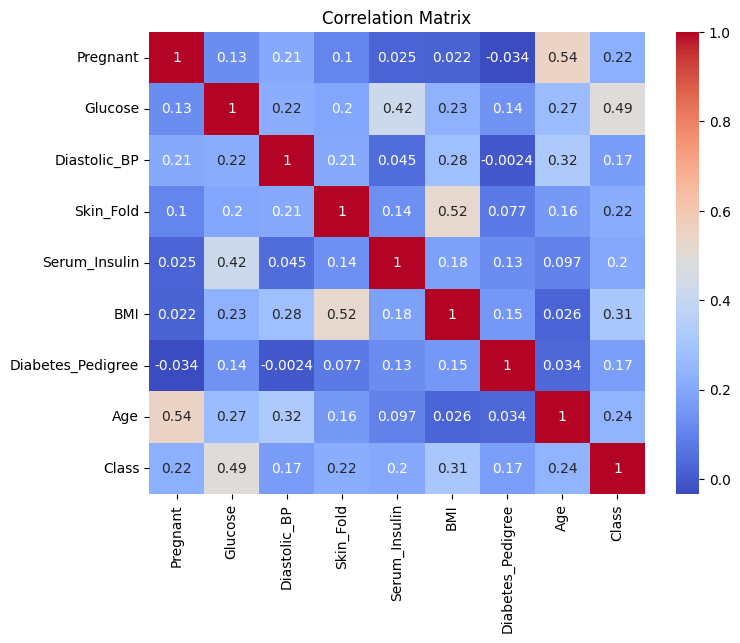

In [104]:
# Heatmap visualising the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df0.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



#### 2.1-)Visualization of data distribution with boxplots and histograms.

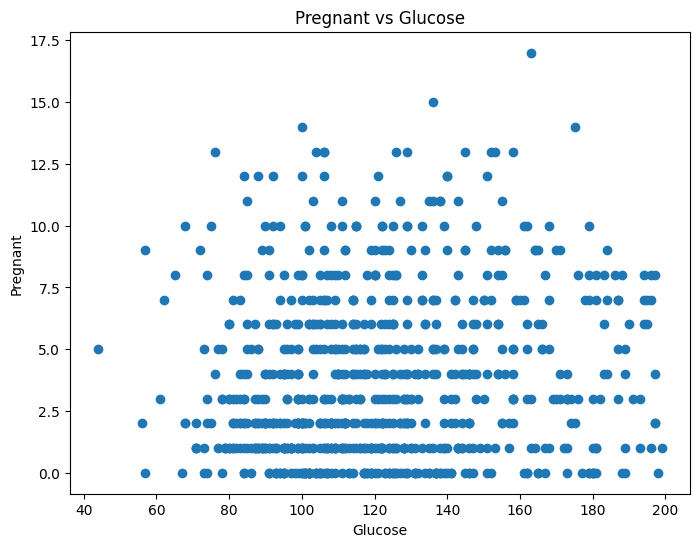

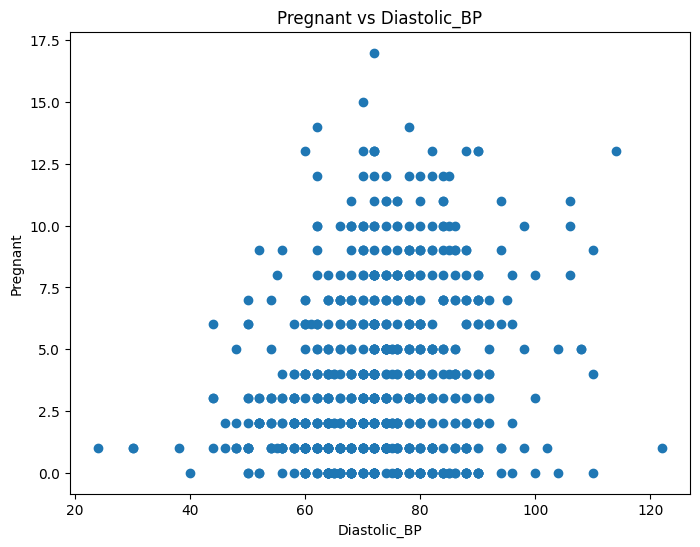

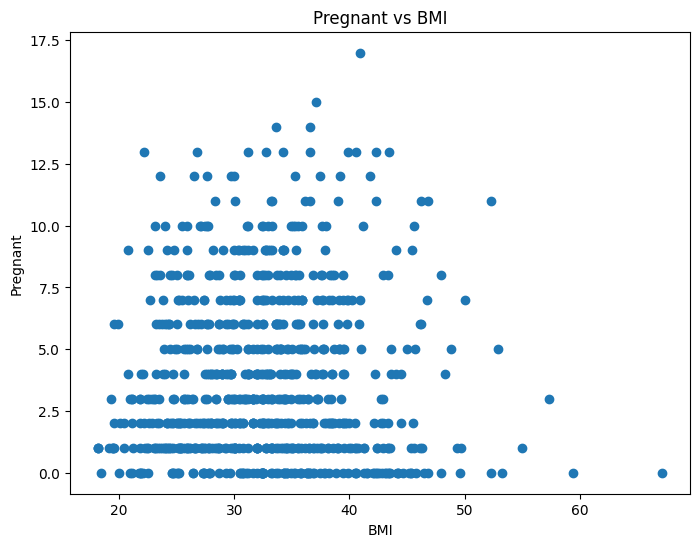

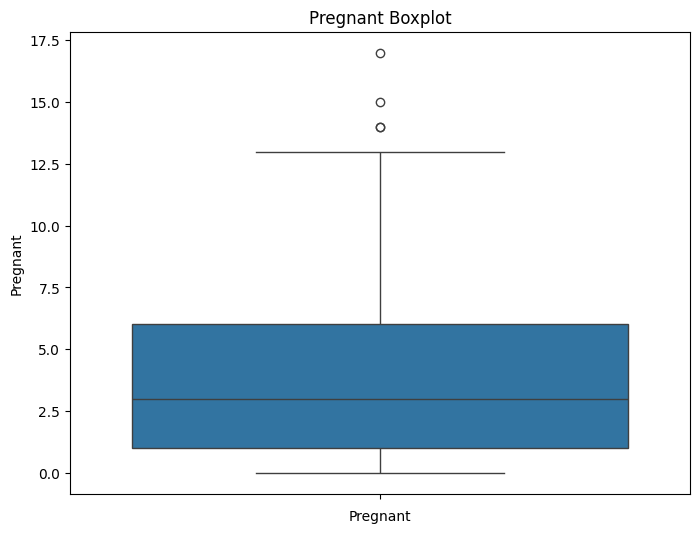

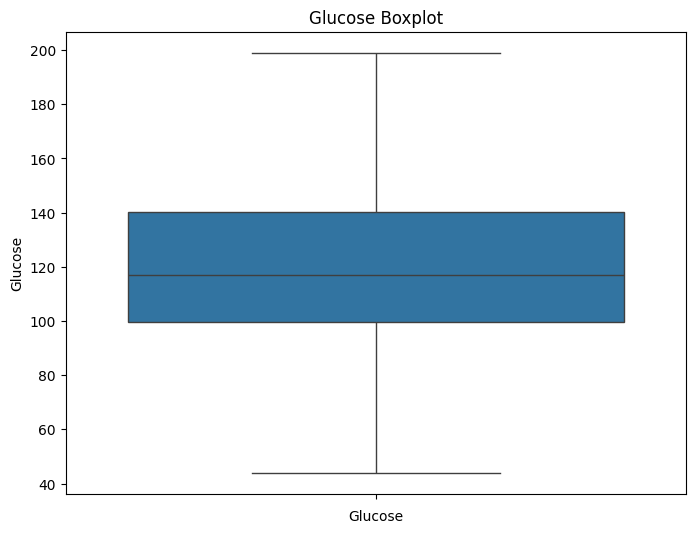

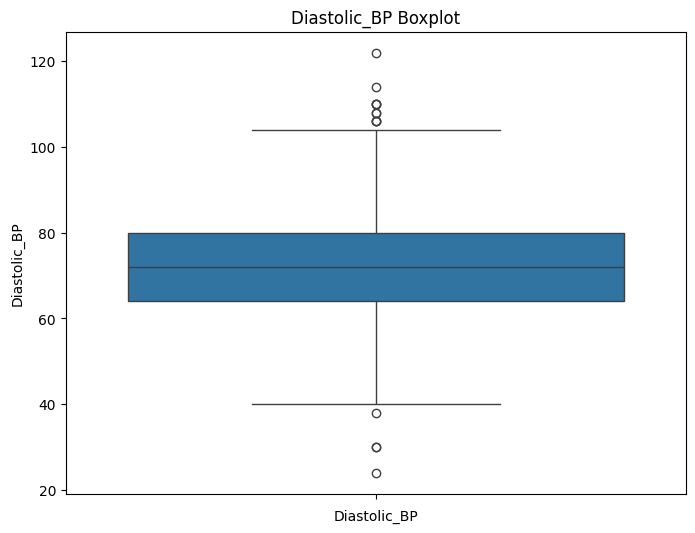

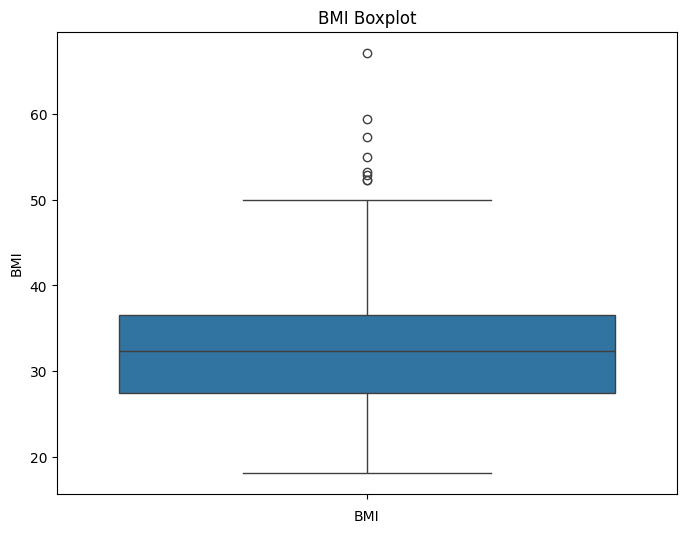

In [105]:
# Analyse the relationship between the variable 'Pregnant' and other variables
# 'Pregnant' vs 'Glucose' Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df0['Glucose'], df0['Pregnant'])
plt.xlabel('Glucose')
plt.ylabel('Pregnant')
plt.title('Pregnant vs Glucose')
plt.show()

# 'Pregnant' vs 'Diastolic_BP' Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df0['Diastolic_BP'], df0['Pregnant'])
plt.xlabel('Diastolic_BP')
plt.ylabel('Pregnant')
plt.title('Pregnant vs Diastolic_BP')
plt.show()

# 'Pregnant' vs 'BMI' Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df0['BMI'], df0['Pregnant'])
plt.xlabel('BMI')
plt.ylabel('Pregnant')
plt.title('Pregnant vs BMI')
plt.show()

# Perform statistical analyses on variables
# Calculate descriptive statistics for 'Pregnant'
pregnant_stats = df0['Pregnant'].describe()
pregnant_stats

# Calculate descriptive statistics for 'Glucose'
glucose_stats = df0['Glucose'].describe()
glucose_stats

# Calculate descriptive statistics for 'Diastolic_BP'
diastolic_bp_stats = df0['Diastolic_BP'].describe()
diastolic_bp_stats

# Calculate descriptive statistics for 'BMI'
bmi_stats = df0['BMI'].describe()
bmi_stats

# 4. Identify outliers in the data
# Boxplot for "Pregnant"
plt.figure(figsize=(8, 6))
sns.boxplot(df0['Pregnant'])
plt.xlabel('Pregnant')
plt.title('Pregnant Boxplot')
plt.show()

# Boxplot for 'Glucose'
plt.figure(figsize=(8, 6))
sns.boxplot(df0['Glucose'])
plt.xlabel('Glucose')
plt.title('Glucose Boxplot')
plt.show()

# Boxplot for 'Diastolic_BP'
plt.figure(figsize=(8, 6))
sns.boxplot(df0['Diastolic_BP'])
plt.xlabel('Diastolic_BP')
plt.title('Diastolic_BP Boxplot')
plt.show()

# Boxplot for 'BMI'
plt.figure(figsize=(8, 6))
sns.boxplot(df0['BMI'])
plt.xlabel('BMI')
plt.title('BMI Boxplot')
plt.show()

##### 1.1.a-) First Data Set Owerviewing  Correlation Matrix, Scartter, Histogram

<Figure size 1000x800 with 0 Axes>

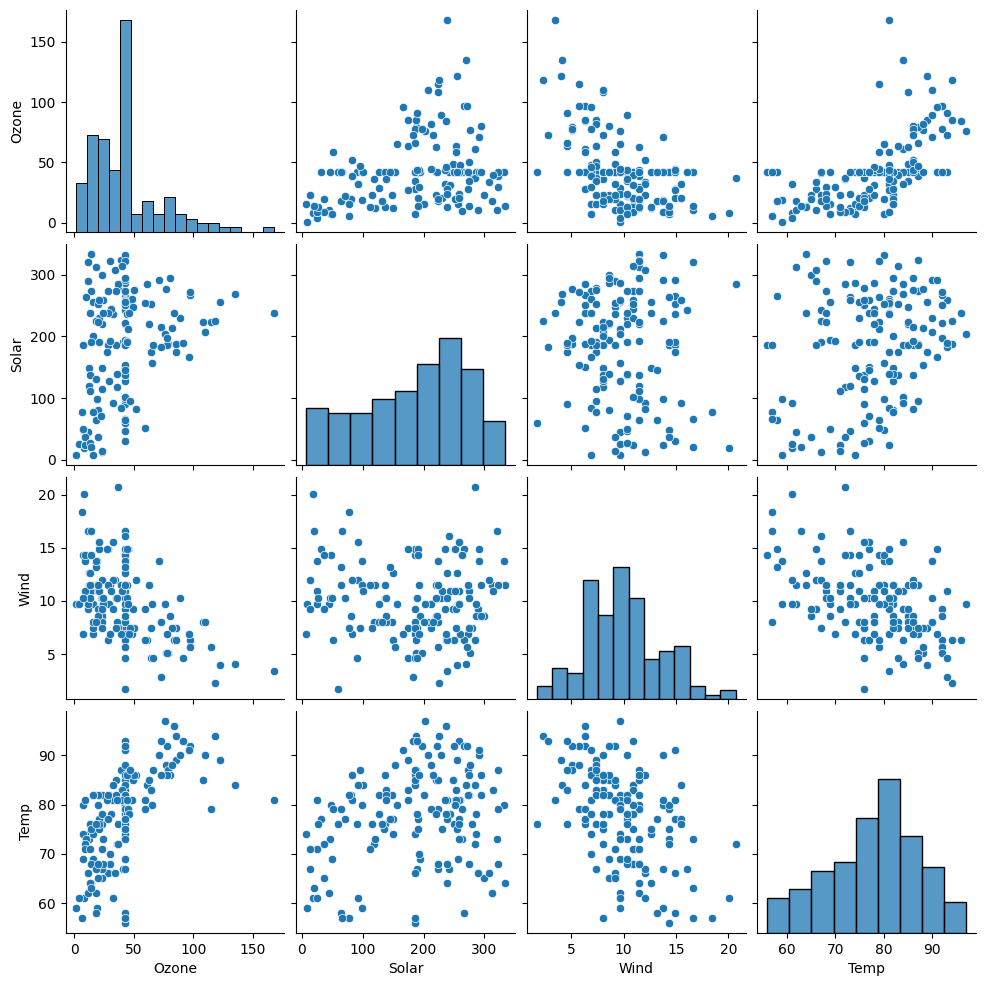

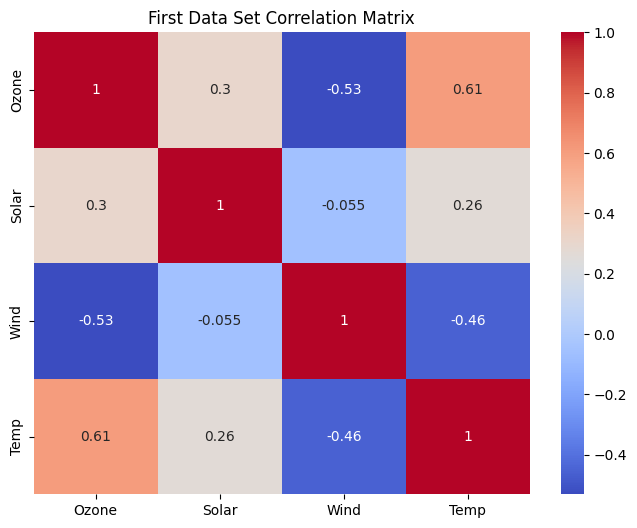

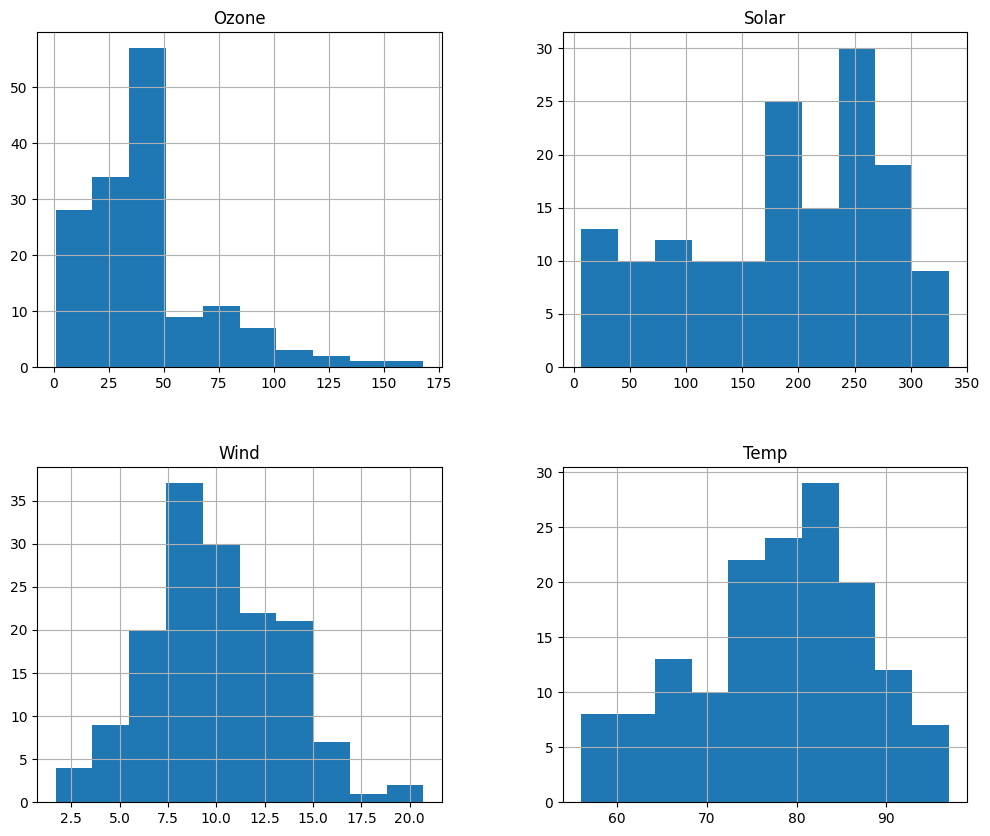

In [106]:
# Scatter plot
plt.figure(figsize=(10, 8))
sns.pairplot(df)
plt.show()

# Correlation matrix
correlation_matrix_df = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_df, annot=True, cmap='coolwarm')
plt.title('First Data Set Correlation Matrix')
plt.show()

# Histograms
df.hist(figsize=(12, 10))
plt.show()


##### 2.1.a-) Second Data Set Owerviewing  Correlation Matrix, Scartter, Histogram

<Figure size 1000x800 with 0 Axes>

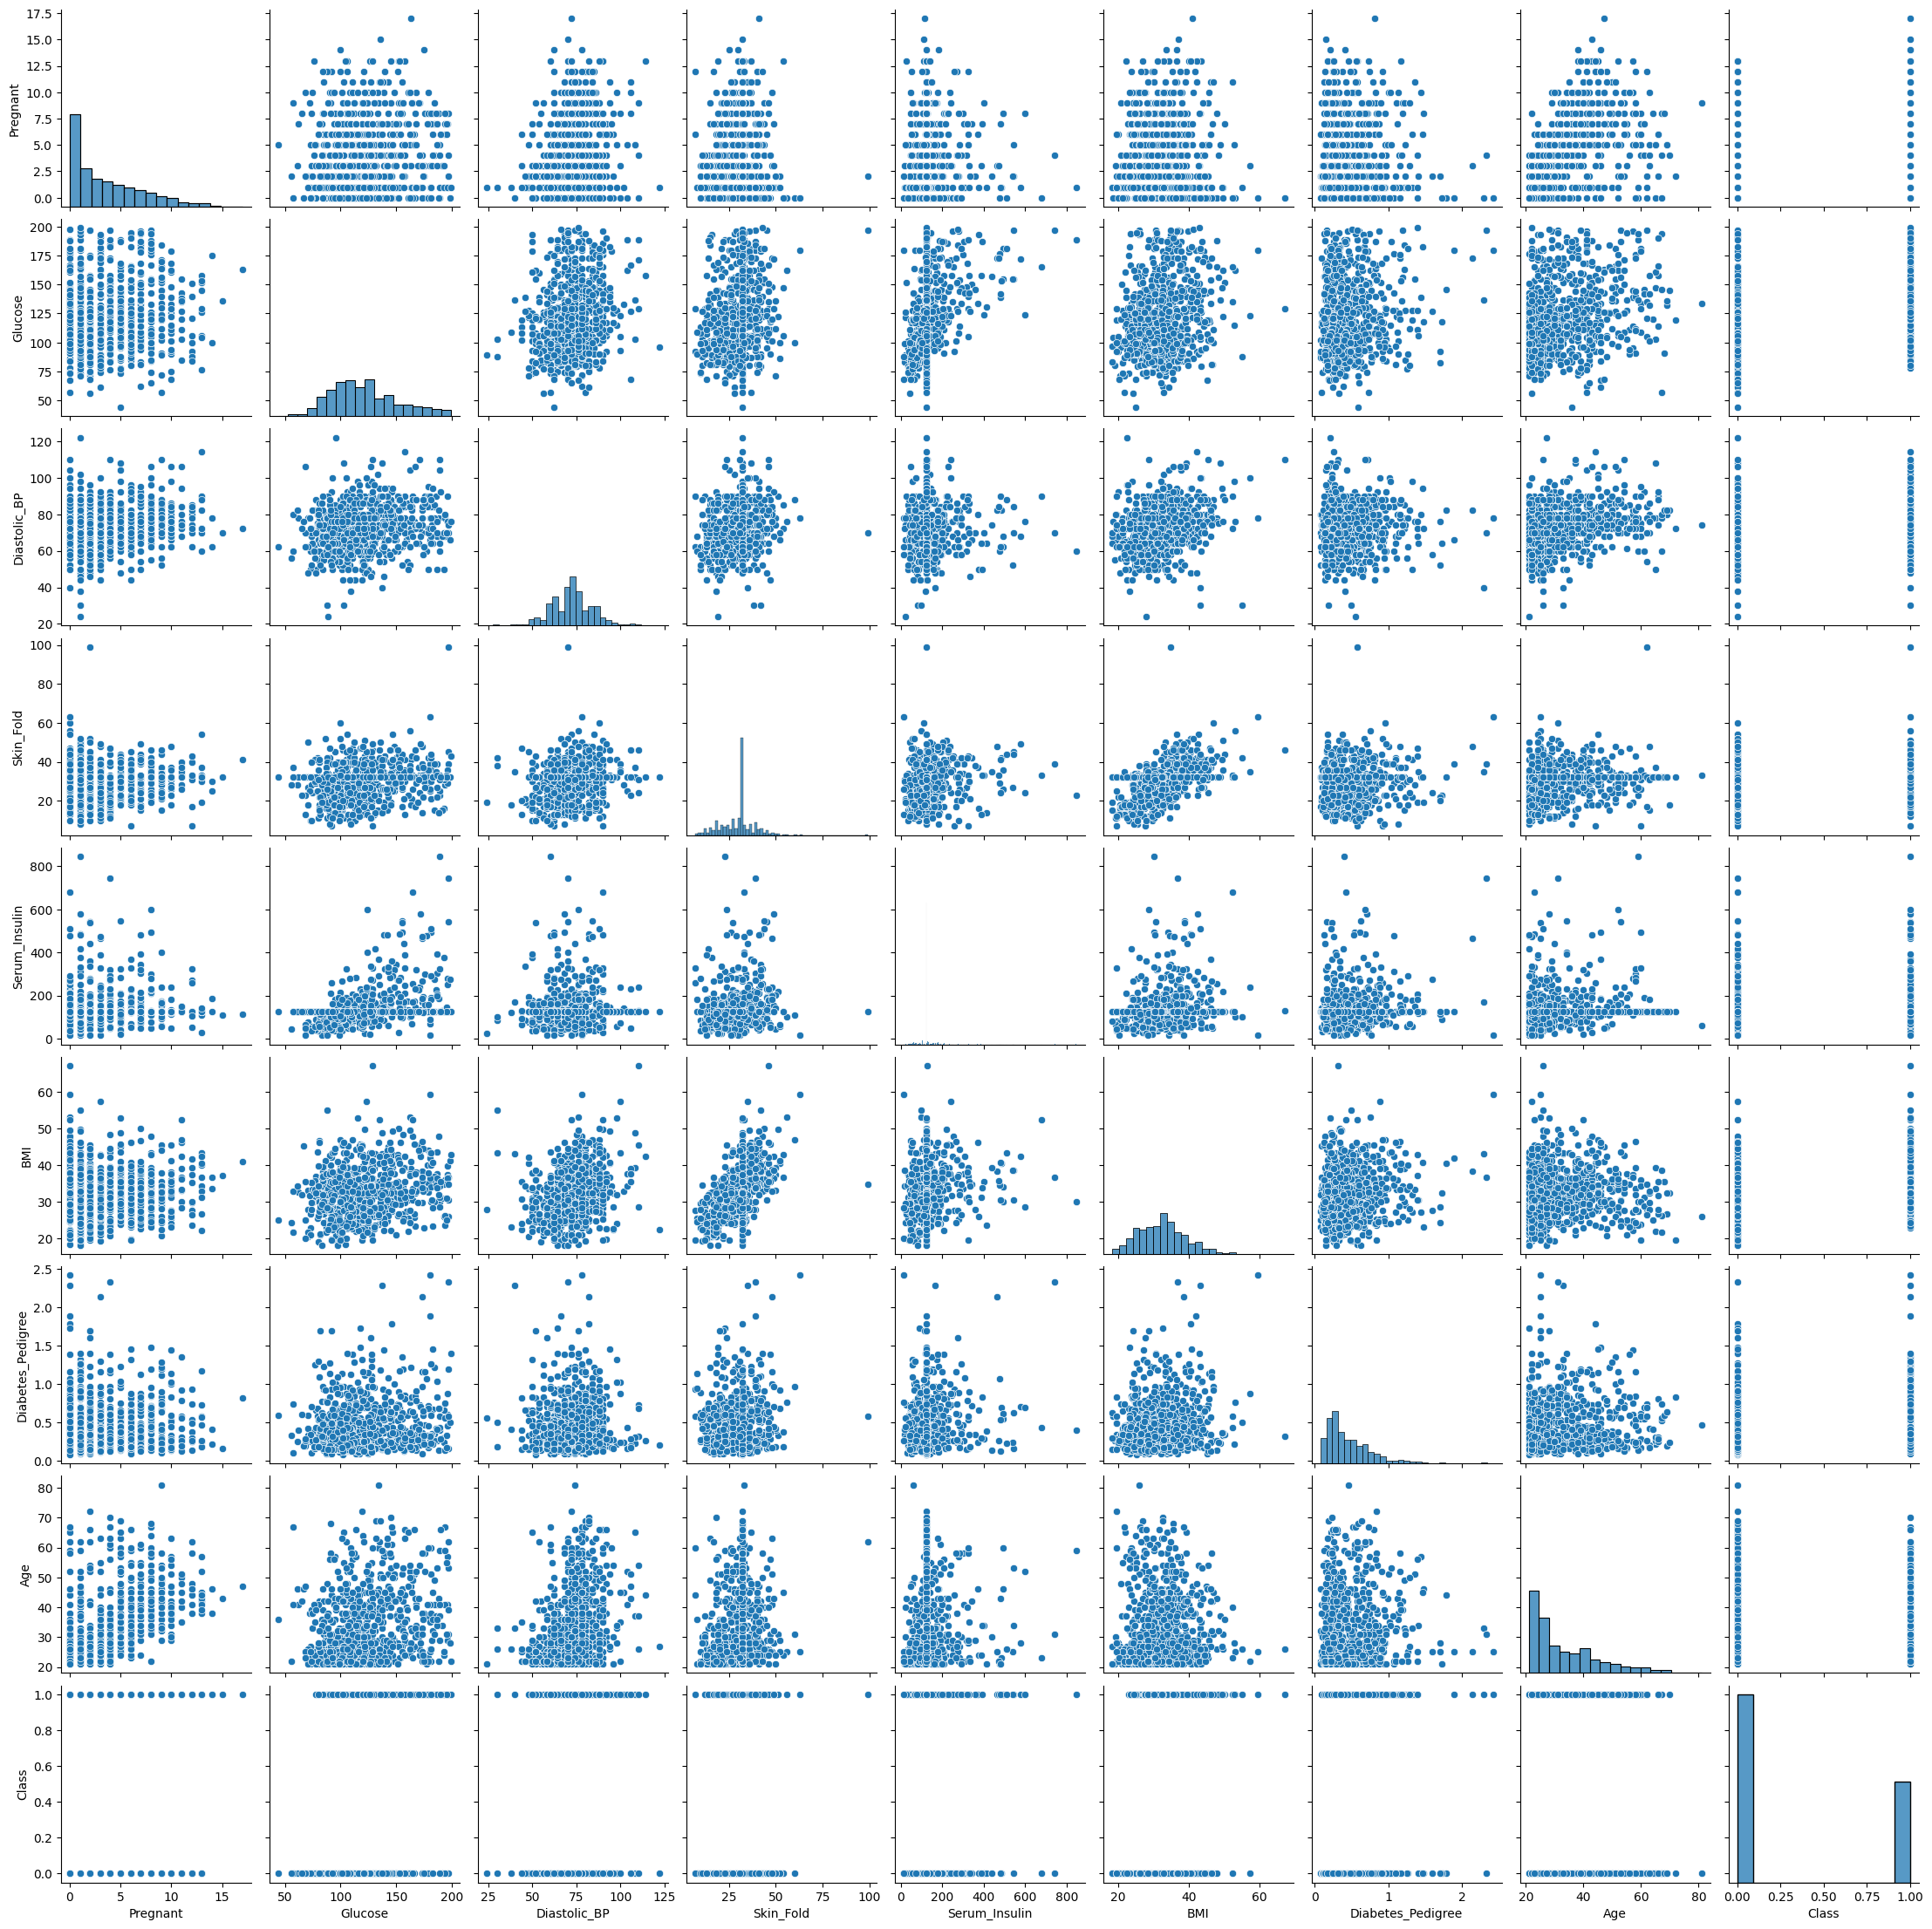

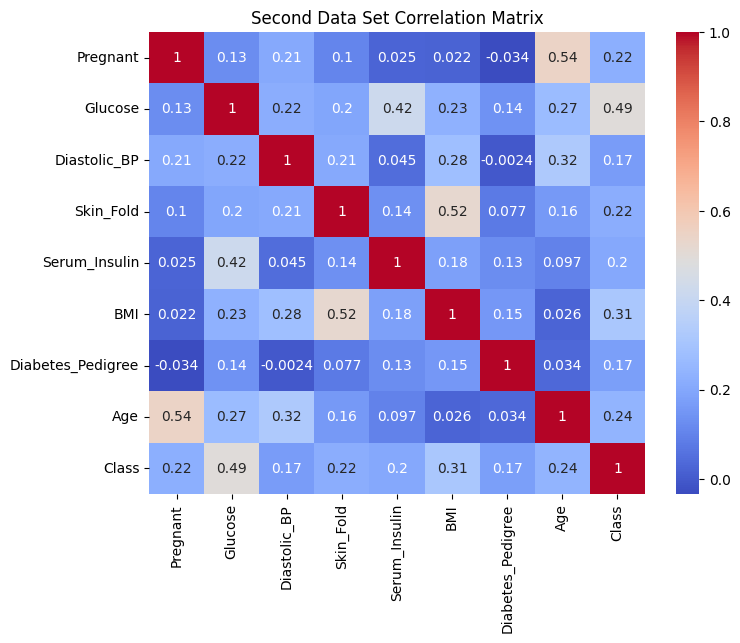

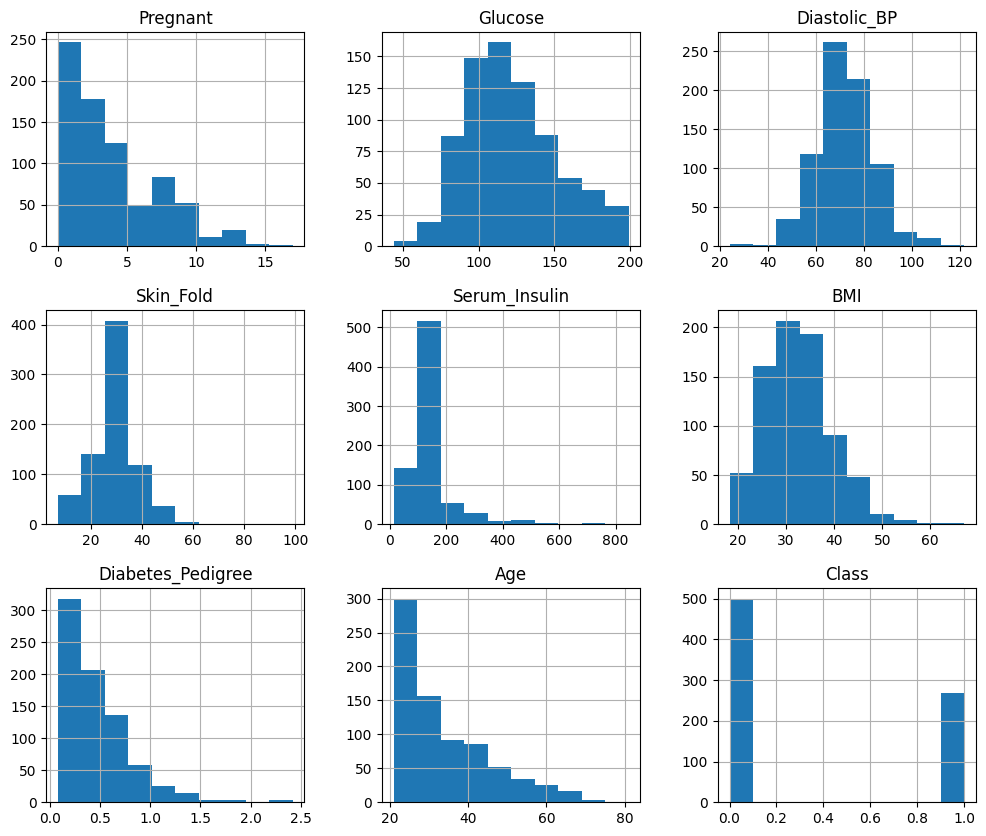

In [107]:
# Scatter plot
plt.figure(figsize=(10, 8))
sns.pairplot(df0)
plt.show()

# Correlation matrix
correlation_matrix_df0 = df0.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_df0, annot=True, cmap='coolwarm')
plt.title('Second Data Set Correlation Matrix')
plt.show()

# Histograms
df0.hist(figsize=(12, 10))
plt.show()


# 4-) Hypothesis Tests

### --->

- Testing for significant differences between variables in the first data set.
- Testing for significant differences between variables in the second data set.
- Explaining the statistical tests you used and their results.

### For First Data

In [108]:
from scipy.stats import ttest_ind

# Hypothesis Testing: Difference between Ozone and Solar
stat, p_value = ttest_ind(df['Ozone'], df['Solar'], nan_policy='omit')

# H0 hypothesis: There is no difference between the averages.
# H1 hypothesis: There is a difference between the averages.

alpha = 0.05

print(f"P-value: {p_value}")

if p_value < alpha:
    print("The hypothesis H0 is rejected. There is a significant difference between the means.")
else:
    print("The hypothesis H0 is accepted. There is no significant difference between the means.")

P-value: 1.857549567281888e-54
The hypothesis H0 is rejected. There is a significant difference between the means.


#### This result shows that there is a statistically significant difference between the variables "Ozone" and "Solar". This means that there is a significant difference between the means of two variables and that this difference does not occur randomly.

### For Second Data

In [109]:
# Hypothesis Testing: Difference between Glucose and BMI
stat, p_value = ttest_ind(df0['Glucose'], df0['BMI'], nan_policy='omit')

#H0 hypothesis: There is no difference between the means.
# H1 hypothesis: There is a difference between the means.

alpha = 0.05

print(f"P-value: {p_value}")

if p_value < alpha:
    print("H0 hypothesis was rejected. There is a significant difference between the means.")
else:
    print("H0 hypothesis was accepted. There is no significant difference between the means.")

P-value: 0.0
H0 hypothesis was rejected. There is a significant difference between the means.


#### This result shows that there is a statistically significant difference between "Glucose" and "BMI" variables. In other words, there is a significant difference between the means of these two variables, not a random difference.

# 5-) Difference Analysis and Visualization





## - Visual inspection of differences between variables in the first data set.

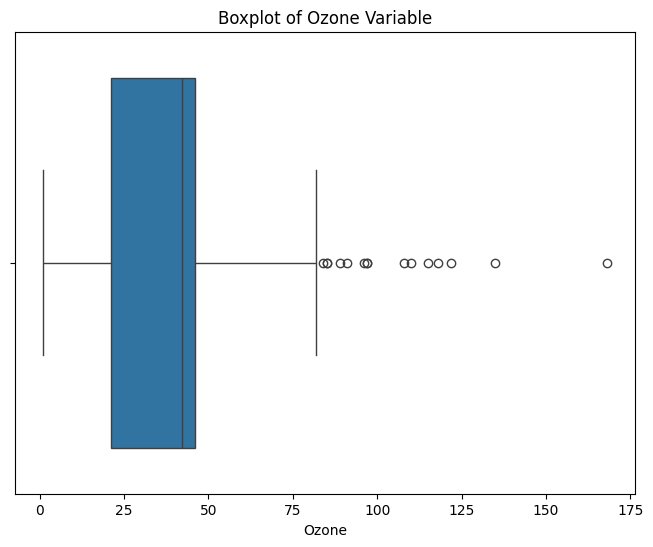

In [110]:
# Boxplot of 'Ozone'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Ozone', data=df)
plt.xlabel('Ozone')
plt.title('Boxplot of Ozone Variable')
plt.show()

## - Visual inspection of differences between variables in the second data set.

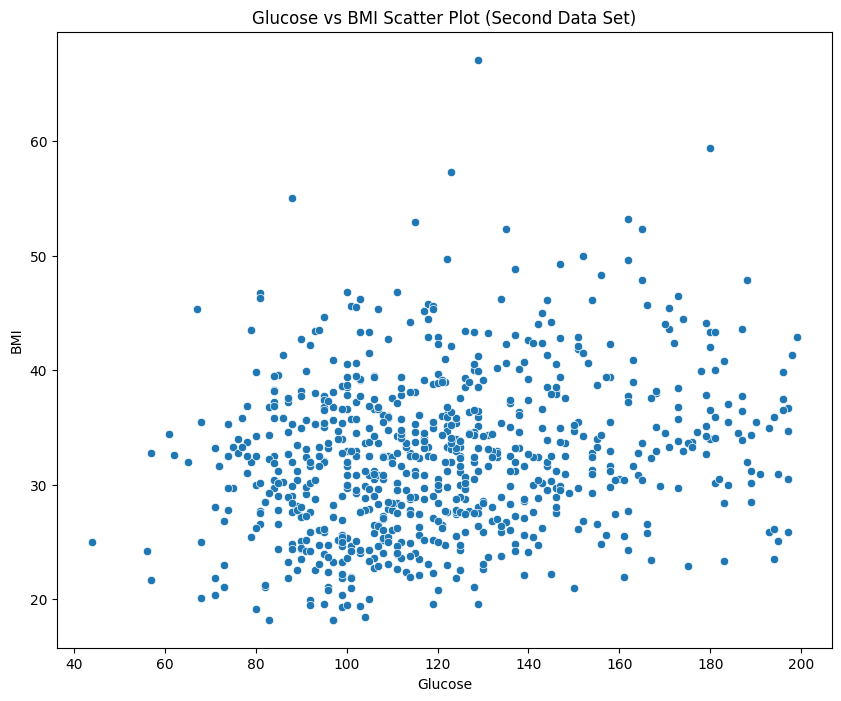

In [111]:
# Scatter plot of 'Glucose' vs 'BMI' for the second data set (df0)
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Glucose', y='BMI', data=df0)
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('Glucose vs BMI Scatter Plot (Second Data Set)')
plt.show()


# 6-)Modelling

## - Regression analysis steps and results performed on the first data set.


In [112]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Independent variables
X_reg = df[['Solar', 'Wind', 'Temp']]

# Target variable
y_reg = df['Ozone']

# Separating the data into training and test sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Creating the regression model
reg_model = LinearRegression()
reg_model.fit(X_train_reg, y_train_reg)

# Don't guess
y_pred_reg = reg_model.predict(X_test_reg)

# Model evaluation
mse_reg = mean_squared_error(y_test_reg, y_pred_reg)
r2_reg = r2_score(y_test_reg, y_pred_reg)

print(f'Mean Squared Error (MSE): {mse_reg}')
print(f'R-squared (R2): {r2_reg}')

Mean Squared Error (MSE): 365.31637299526386
R-squared (R2): 0.4989947227530651


**`Mean Square Error (MSE):`**

MSE measures how much your regression model's predictions deviate from the true values.
The MSE value you get is 365.316. This indicates that your model's average squared error amount is this value. Lower MSE values indicate a better model representation.

`**R-squared (R2):
**`
R-squared measures how much of the variance of the independent variables explains on the independent variable.
The R-squared value you get is 0.499. This indicates that your model's independent variables explain 49.9 percent of its variance on the independent variable. The closer it is to 1, the better the fit of the model.

## - Classification analysis steps and results performed on the second data set.

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Independent variables
X_clf = df0[['Pregnant', 'Glucose', 'BMI', 'Age']]

# Target variable
y_clf = df0['Class']

# Separating the data into training and test sets
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

# Creating the classification model
clf_model = RandomForestClassifier()
clf_model.fit(X_train_clf, y_train_clf)

# Don't guess
y_pred_clf = clf_model.predict(X_test_clf)

# Model evaluation
accuracy_clf = accuracy_score(y_test_clf, y_pred_clf)
classification_report_clf = classification_report(y_test_clf, y_pred_clf)

print(f'Accuracy: {accuracy_clf}')
print('Classification Report:')
print(classification_report_clf)

Accuracy: 0.7727272727272727
Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.81      0.82        99
         1.0       0.67      0.71      0.69        55

    accuracy                           0.77       154
   macro avg       0.75      0.76      0.76       154
weighted avg       0.78      0.77      0.77       154



`**Accuracy:**`

The accuracy value of the model is 0.7597, that is, the ratio of correct predictions to total predictions.
In this case, it shows that the model correctly classified approximately 75.97% of the observations in the dataset.

**`Classification Report:`**

The classification report provides key performance metrics for each class: precision, recall, f1-score, and support.
Precision shows the ratio of predicted positives to true positives for a class.
Recall refers to the ratio of true positives to all true positives of the class.
F1-score is the harmonic mean of precision and recall.
Support indicates the number of observations for each class.

**`Macro and Weighted Averaging:`**

Macro avg gives an equally weighted average of each class's performance.
Weighted avg gives the weighted average of the performance of each class according to the number of observations.
The results show that the model achieves good accuracy for classes 0.0 and 1.0, but the difference in performance between classes is evaluated.